# Final project, Numerical Analysis 2018-2019


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [1]:
%pylab inline

# # input image dimensions
# img_rows, img_cols = 28, 28

# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
# import keras
# from keras.datasets import mnist

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (img_rows, img_cols)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

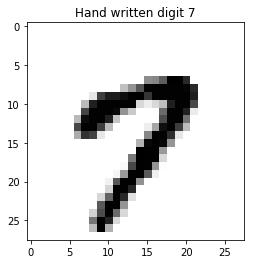

In [2]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.



# Exam solution - Patrick Indri

In [3]:
from numpy import linalg
import time

# Define context manager to measure time

class CodeTimer:
    def __init__(self, name=None):
        self.name = "Executed '"  + name + "'. " if name else ""

    def __enter__(self):
        self.start = time.perf_counter()

    def __exit__(self, exc_type, exc_value, traceback):
        self.end = time.perf_counter()
        self.elapsed = (self.end - self.start)
        print('%s Elapsed time: %0.6fs' % (str(self.name), self.elapsed))

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

### Solution:

In [4]:
# Implementing distance functions.
# The commented out alternatives perform slower.

def d_inf(image_1, image_2):
    """ Computes the l-infty norm between two images """
    return np.max(np.abs(image_1 - image_2))
    # return np.linalg.norm(image_1 - image_2, inf)

def d_one(image_1, image_2):
    """ Computes the 1-norm between two images """
    return np.sum(np.abs(image_1 - image_2))
    # return np.linalg.norm(image_1 - image_2, 1)

def d_two(image_1, image_2):
    return np.sqrt(np.sum((image_2 - image_1)**2))
    # return np.linalg.norm(image_1 - image_2, 2)  

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

### Solution:

In [5]:
def distance_matrix(N, dist, data_set):
    """ 
    Computes the distance matrix between the first 'N' elements
    of a given 'data_set', using 'dist' as a distance function.
    """
    d_matrix = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            # Upper and lower triangular are computed at the same time.
            # The diagonal elements are not computed: they are zero.
            d_matrix[i,j] = d_matrix[j,i] = dist(data_set[i], data_set[j])
    return d_matrix

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

### Solution:

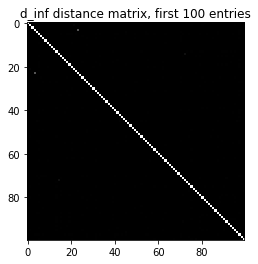

In [6]:
d_inf_matrix = distance_matrix(100,d_inf,x_train)
plt.imshow(d_inf_matrix, cmap='gray_r')
_ = plt.title('d_inf distance matrix, first 100 entries')

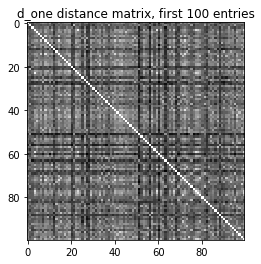

In [7]:
d_one_matrix = distance_matrix(100,d_one,x_train)
plt.imshow(d_one_matrix, cmap='gray_r')
_ = plt.title('d_one distance matrix, first 100 entries')

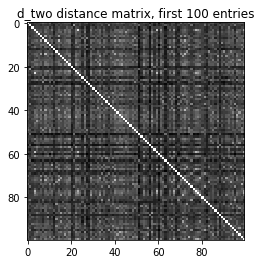

In [8]:
d_two_matrix = distance_matrix(100,d_two,x_train)
plt.imshow(d_two_matrix, cmap='gray_r')
_ = plt.title('d_two distance matrix, first 100 entries')

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

### Solution:

In [9]:
def err_rate(dist_matrix):
    """ Implements a LeaveOneOut stragegy """
    N = len(dist_matrix)
    err_counter = 0
    np.fill_diagonal(dist_matrix, inf) # diagonal set to 'inf'
    for i in range(N):
        smallest_index = argmin(dist_matrix[i])
        if y_train[smallest_index] != y_train[i]:
            err_counter += 1
    np.fill_diagonal(dist_matrix, 0) # reset diagonal entries to original values
    return (err_counter)/N

# Applying the 'err_rate' function to the previously computed matrices
[err_rate(d_inf_matrix), err_rate(d_one_matrix), err_rate(d_two_matrix)]

[0.58, 0.17, 0.17]

The approach used sets the diagonal elements to `inf`, so that they cannot be the smaller ones. Then `numpy.argmin` is used to find the index of the minimum value. `numpy.argmin` should have $O(N)$ complexity, where $N$ is the lenght of a row. As an alternative approach, each row can be sorted and the second smallest value can be taken (this approach is implemented in `heapq.nlargest`). However, this operation is $O(Nlog(N))$, which would result in worse performance increasing $N$.



# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

**In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance**



### Solution:

In [10]:
distances = [d_inf, d_one, d_two]
sizes = [100,200,400,800,1600]

# Pre-computing larger distance matrices
with CodeTimer("computation of max_matrices"):
    max_matrices = [(distance_matrix(max(sizes), norm,x_train)) for norm in distances]

# Extract smaller dimensions slicing the larger distance matrices
with CodeTimer("computation of d_matrices"):
    d_matrices = [ max_matrices[i][0:N,0:N] for N in sizes for i in range(0,len(distances)) ]

Executed 'computation of max_matrices'.  Elapsed time: 39.680412s
Executed 'computation of d_matrices'.  Elapsed time: 0.000019s


In [11]:
tot_efficiency = np.array( [err_rate(d) for d in d_matrices] ).reshape((5,3))
tot_efficiency

array([[0.58    , 0.17    , 0.17    ],
       [0.52    , 0.145   , 0.135   ],
       [0.4425  , 0.15    , 0.135   ],
       [0.4     , 0.145   , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 ]])

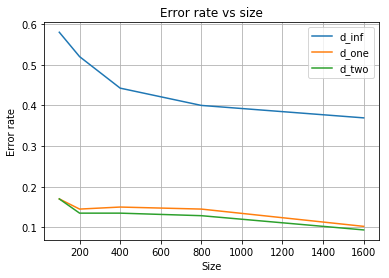

In [12]:
for i in range(len(tot_efficiency.T)):
    plt.plot(sizes, tot_efficiency.T[i])
_ = plt.title("Error rate vs size")
_ = plt.legend(["d_inf", "d_one", "d_two"])
_ = plt.xlabel("Size")
_ = plt.ylabel("Error rate")
_ = plt.grid()


# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600



### Solution:

In [13]:
def get_normalized(image):
    """ Normalizes the ;image', dividing it by its integral """
    return image/sum(image)


def get_gradient_squared(data):
    """ Computes the squared gradient for an image """
    gradient = np.gradient(data)
    return gradient[0]**2 + gradient[1]**2  # 2D squared gradient as sum
                                            # of squared gradients on each dim


def normalize_set(data):
    """ Normalizes each image of a set """
    normalized_data = np.zeros((len(data), 28, 28))
    for image in range(len(data)):
        normalized_data[image] = get_normalized(data[image])
    return normalized_data


def d_H1(image_1, image_2):
    """ Computes H1 distance between two images.
        NOTE: Assumes images are aready normalized. """
    diff = image_1 - image_2
    return np.sqrt(sum(get_gradient_squared(diff) + diff**2))

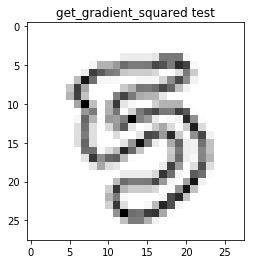

In [14]:
# Testing gradient
imshow(get_gradient_squared(x_train[554]), cmap='gray_r')
_ = plt.title("get_gradient_squared test")

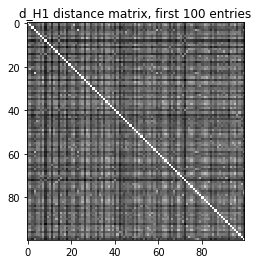

In [15]:
norm_set = normalize_set(x_train)

# Distance matrix
imshow(distance_matrix(100, d_H1, norm_set), cmap="gray_r")
_ = plt.title("d_H1 distance matrix, first 100 entries")

In [16]:
sizes = [100,200,400,800,1600]

# Pre-computing larger distance matrices. Note: using 'norm_set'
with CodeTimer("computation of max_matrix"):
    max_matrix = distance_matrix(max(sizes), d_H1, norm_set)

# Extract smaller dimensions slicing the larger distance matrices
with CodeTimer("computation of d_H1_matrix"):
    d_H1_matrix = [ max_matrix[0:N,0:N] for N in sizes ]

Executed 'computation of max_matrix'.  Elapsed time: 94.979979s
Executed 'computation of d_H1_matrix'.  Elapsed time: 0.000007s


In [17]:
efficiency_d_H1 = np.array( [err_rate(d) for d in d_H1_matrix] ).reshape((5,1))
tot_efficiency = np.append(tot_efficiency, efficiency_d_H1, axis = 1)

array([[0.58    , 0.17    , 0.17    , 0.23    ],
       [0.52    , 0.145   , 0.135   , 0.175   ],
       [0.4425  , 0.15    , 0.135   , 0.145   ],
       [0.4     , 0.145   , 0.12875 , 0.12125 ],
       [0.369375, 0.1025  , 0.09375 , 0.099375]])

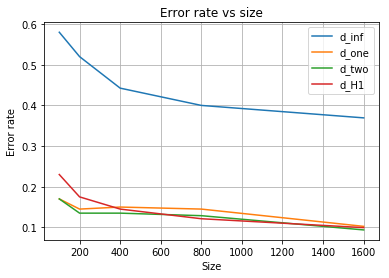

In [18]:
for i in range(len(tot_efficiency.T)):
    plot(sizes, tot_efficiency.T[i])
_ = plt.title("Error rate vs size")
_ = plt.legend(["d_inf", "d_one", "d_two", "d_H1"])
_ = plt.xlabel("Size")
_ = plt.ylabel("Error rate")
_ = plt.grid()

tot_efficiency

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

### Solution:

In [19]:
from scipy.sparse import diags # To construct a sparse matrix from diagonals.
from scipy import linalg

def build_laplacian(N):
    """ Builds the N^2 * N^2 matrix for finite difference """
    l_matrix = diags([-1,-1,4,-1,-1],[-N,-1,0,1,N], shape = (N*N,N*N)).toarray()
    for i in range(1,N):
        l_matrix[i*N, (i*N)-1] = 0 # Set to zero every N-1 element
        l_matrix[(i*N)-1, i*N] = 0 # on the +1,-1 diagonals.
    return l_matrix

Exploiting linearity, the following function solves $\Delta (\phi_i)=image_i$ for every normalized image in the set. Then, the solution of $\Delta (\phi)=image_i - image_j$ is $\phi = \phi_i - \phi_j$.

Some info [here](https://sites.google.com/site/varga1kalman/teaching/physics-257-computational-physics/lectures/lecture-5/discrete-poisson-equation) and [here](https://en.wikipedia.org/wiki/Discrete_Poisson_equation) on the approach.

In [20]:
# Precompute LU decomposition
LU = linalg.lu_factor(build_laplacian(26)) # 26 = len(x_train[i])-2


def build_phi(norm_set, LU):
    """ Solves lap(phi) = image for each image in a give data set"""
    phi_set = np.zeros((len(norm_set), 28, 28))
    for image_index in range (len(phi_set)):
        phi = np.zeros((28,28))
        B = norm_set[image_index][1:27,1:27].ravel() # Compute exluding boundary
        phi[1:27,1:27] = linalg.lu_solve(LU, B).reshape((26,26)) # Boundaries set to 0
        phi_set[image_index] = phi
    return phi_set

with CodeTimer("precomputation of phi_set"):
    phi_set = build_phi(norm_set, LU)

Executed 'precomputation of phi_set'.  Elapsed time: 14.658865s


In [21]:
def d_MA(index_1, index_2, norm_set, phi_set):
    """ Computes Monge Ampere distance, assuming normalized images """
    phi = phi_set[index_1] - phi_set[index_2]
    sum_images = norm_set[index_1] + norm_set[index_2]

    return sum(get_gradient_squared(phi) * sum_images)

In [22]:
# Build d_MA distance matrix
def d_MA_distance_matrix(N, norm_set, phi_set):
    d_matrix = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            # upper and lower triangular are computed at the same time.
            d_matrix[i,j] = d_matrix[j,i] = d_MA(i,j,norm_set, phi_set)
    return d_matrix

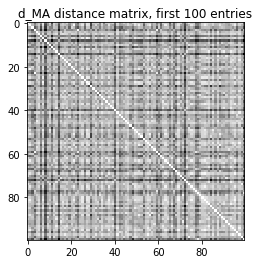

In [23]:
plt.imshow(d_MA_distance_matrix(100, norm_set, phi_set), cmap="gray_r")
_ = plt.title("d_MA distance matrix, first 100 entries")

In [24]:
sizes = [100,200,400,800,1600]

# Pre-computing larger distance matrices.
# Note: using precomputed 'norm_set' and 'phi_set'
with CodeTimer("computation of d_MA_max_matrix"):
    d_MA_max_matrix = d_MA_distance_matrix(max(sizes), norm_set, phi_set)

# Extract smaller dimensions slicing the larger distance matrices
with CodeTimer("computation of d_MA_matrix"):
    d_MA_matrix = [ d_MA_max_matrix[0:N,0:N] for N in sizes ]

Executed 'computation of d_MA_max_matrix'.  Elapsed time: 92.443605s
Executed 'computation of d_MA_matrix'.  Elapsed time: 0.000006s


In [25]:
efficiency_d_MA = np.array( [err_rate(d) for d in d_MA_matrix] ).reshape((5,1))

In [26]:
tot_efficiency = np.append(tot_efficiency, efficiency_d_MA, axis = 1)

array([[0.58    , 0.17    , 0.17    , 0.23    , 0.24    ],
       [0.52    , 0.145   , 0.135   , 0.175   , 0.2     ],
       [0.4425  , 0.15    , 0.135   , 0.145   , 0.145   ],
       [0.4     , 0.145   , 0.12875 , 0.12125 , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 , 0.099375, 0.12125 ]])

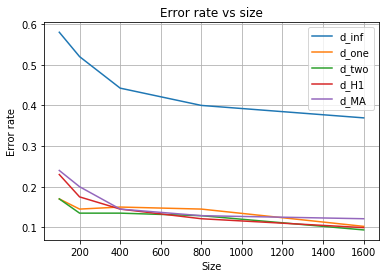

In [27]:
for i in range(len(tot_efficiency.T)):
    plot(sizes, tot_efficiency.T[i])
_ = plt.title("Error rate vs size")
_ = plt.legend(["d_inf", "d_one", "d_two", "d_H1", "d_MA"])
_ = plt.xlabel("Size")
_ = plt.ylabel("Error rate")
_ = plt.grid()

tot_efficiency


## Assigment 8 (optional for DSSC, PhD and LM, Mandatory for MHPC)

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses one of the custom distances defined above**.

For each N in 3200,6400,12800,25600,51200, and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

### Solution:

In [28]:
from sklearn.neighbors import BallTree

`BallTree` accepts user defined distances by setting `metric = "pyfunc"` and passing a parameter `func`, a function which takes two one-dimensional numpy arrays, and returns a distance. All the previously defined distances should now be adapted in order to accept two one-dimensional arrays.

Until now, two different interfaces to custom distances have been used: `d(image_1, image_2)` for the first 4 distances, and `d_MA(image_1, image_2, norm_set, phi_set)` for the last one. The following `BallTree_distance_adapter` function deals with both cases. In particular, when building a tree, the dataset to be passed should be `[train_set, test_set]`, where the user must make sure `train_set` is normalized when dealing with `d_H1` distance. The concatenation between the training and test sets, allows easy access to the latter (just use indices larger than `len(train_set)`.


In [29]:
def BallTree_distance_adapter(image_1, image_2, dist_function, data_set = None, phi_set = None):
    """
    This function wraps the previously defined distances, adapting them to
    work with a BallTree. In particular, this function accepts two one-dimensional
    arrays 'image_1' and 'image_2' which indexes of actual images in the 'norm_set'
    
    Data should contain [train, test] or [norm, test], according to the distance used.
    """
    image_1, image_2 = int(image_1), int(image_2) # To satisfy requirements for int or bool indeces
        
    if (phi_set is not None): # Deals with d_MA case
        return dist_function(image_1, image_2, data_set, phi_set)
#     if (norm_set is not None): # Deals with d_H1 case
#         return dist_function(norm_set[image_1], norm_set[image_2])
    
    return dist_function(data_set[image_1], data_set[image_2]) # Default case
    

def BallTree_ctor(N, dist_function, leaf_size = 40, data_set = None, phi_set = None):
    """
    Provides a unique interface to build a BallTree accessing the first
    'N' indeces of the 'data_set' array.
    """
    return BallTree(np.arange(N).reshape(-1,1), leaf_size = 40, metric = "pyfunc", func = BallTree_distance_adapter,
                    dist_function = dist_function, data_set = data_set, phi_set = phi_set)

The following function deals with the error rate computation. As previously stated, the test set can be accessed using large indices (indices larger than `len(x_train)`).

In [30]:
def BallTree_err_rate (ball_tree, k, N, y_train, y_test):
    """
    Computes the error rate in classifing the first 'N' entries of the 'y_test' set.
    
    N is the number of points to be queried
    """
    start_index = len(y_train)
    n_neigh = ball_tree.query(np.arange(start_index, start_index + N).reshape(-1,1),
                              k, return_distance = False)
    
    # To deal with cases where k>1, the predicted output is the most common label among the knn
    pred_response = [ argmax(bincount(response_label)) for response_label in y_train[n_neigh]]
    correctly_predicted = sum( pred_response == y_test[0:N])
    
    return ( 1 - correctly_predicted/N)

In [31]:
# Precompute the required data sets, concatenating training and test sets
with CodeTimer("precomputation of data sets"):
    data_set = concatenate((x_train, x_test))
    norm_data_set = normalize_set(data_set)
    phi_data_set = build_phi(norm_data_set, LU)

Executed 'precomputation of data sets'.  Elapsed time: 17.976958s


The `BallTree`s will be organized in a dictionary, labelled with the name of the distance and the size of the problem, where the values are the trees themselves.

The execution time of the `BallTree_err_rate` function is quite large. For this reason, the tests have been performed on a reduced number of test observations (N = 100). This is small 

In [32]:
input_list = [[d_inf, data_set, None],
              [d_one, data_set, None],
              [d_two, data_set, None],
              [d_H1, norm_data_set, None],
              [d_MA, norm_data_set, phi_data_set]]

sizes = [3200,6400,12800,25600,51200]
leaf_size = 40

ball_tree_dict = {}

with CodeTimer("BallTree dictionary computation"):
    for s in sizes:
        print("... computing size", s, "...")
        for i in input_list:
            ball_tree_dict[i[0].__name__, s] = BallTree_ctor(s, i[0], leaf_size, i[1], i[2])

... computing size 3200 ...
... computing size 6400 ...
... computing size 12800 ...
... computing size 25600 ...
... computing size 51200 ...
Executed 'BallTree dictionary computation'.  Elapsed time: 224.938346s


In [33]:
num_neigh = [1, 3, 15]
N = 100 # Number of test observations

with CodeTimer("error rate computation"):
    ball_tree_errors = [ [ [ BallTree_err_rate( ball_tree_dict[i[0].__name__, s], k, N, y_train, y_test) for s in sizes] for i in input_list ] for k in num_neigh]

Executed 'error rate computation'.  Elapsed time: 6376.910831s


In [34]:
ball_tree_errors = np.asarray(ball_tree_errors)
ball_tree_errors

array([[[0.43, 0.38, 0.3 , 0.23, 0.21],
        [0.12, 0.11, 0.07, 0.05, 0.02],
        [0.11, 0.09, 0.07, 0.04, 0.  ],
        [0.05, 0.04, 0.04, 0.02, 0.02],
        [0.09, 0.1 , 0.06, 0.02, 0.01]],

       [[0.41, 0.32, 0.24, 0.22, 0.17],
        [0.09, 0.07, 0.06, 0.05, 0.02],
        [0.06, 0.06, 0.05, 0.03, 0.  ],
        [0.08, 0.04, 0.04, 0.02, 0.01],
        [0.09, 0.07, 0.04, 0.03, 0.03]],

       [[0.39, 0.34, 0.24, 0.21, 0.13],
        [0.09, 0.08, 0.07, 0.05, 0.03],
        [0.09, 0.06, 0.05, 0.04, 0.02],
        [0.06, 0.07, 0.05, 0.03, 0.03],
        [0.08, 0.06, 0.05, 0.04, 0.04]]])

If [HoloViews](http://holoviews.org/) is available, the following interacrive representation of the results provides a nice and easy comparison between the different distances and number of neighbors. Alternatively, standard plots are presented.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
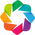

:HoloMap   [Neighbours]
   :NdOverlay   [Element]
      :Curve   [x]   (y)

In [35]:
import holoviews as hv
hv.extension('bokeh')
from holoviews import opts

dist_names = ["d_inf", "d_one", "d_two", "d_H1", "d_MA"]

def dict_k(k):
    dist = np.arange(len(ball_tree_errors.T))
    k_dict = { dist_names[i]:hv.Curve( ( sizes, ball_tree_errors[k].T[i], ('x_col', 'X Label') ) ) for i in dist }
    return hv.NdOverlay(k_dict)

multi_dict = {num_neigh[k]:dict_k(k) for k in range(len(ball_tree_errors))}
hmap = hv.HoloMap(multi_dict, kdims = 'Neighbours')
hmap = hmap.opts(ylabel='Error rate', xlabel='Size', height=300, width=400)

hmap

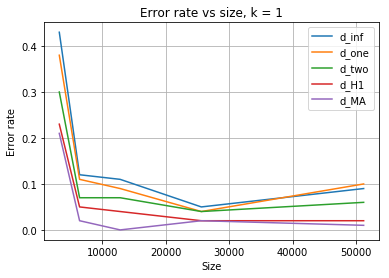

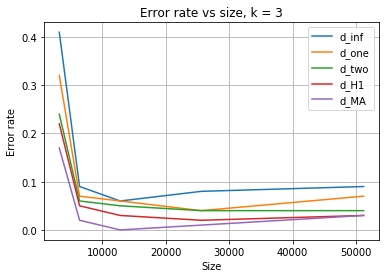

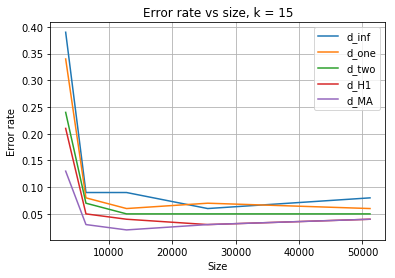

In [36]:
for k in range(len(num_neigh)):
        for i in range(len(ball_tree_errors[k].T)):
            plot(sizes, ball_tree_errors[k].T[i])
        _ = plt.title("Error rate vs size, k = %d" % (num_neigh[k]) )
        _ = plt.legend(["d_inf", "d_one", "d_two", "d_H1", "d_MA"])
        _ = plt.xlabel("Size")
        _ = plt.ylabel("Error rate")
        _ = plt.grid()
        _ = plt.show()

Comparing the results, it seems that the number of nearest neighbours does not play (at least in the tested range) a crucial role in determining efficiency. Analogously, the training set size lowers the error rate only up to $\approx$10000 images: a larger sample size does not increment efficiency.

The `leaf_size` parameter, which determines the (maximum) number of observations for each leaf, is another degree of freedom of the algorithm. Intuitively, decreasing the number of observations per leaf should speed up the searching time; this would impact the error rate computation performance. However, smaller leaves should require more time to compute the actual tree which would be deeper. These cases have not been tested.

The whole computation requires considerable amount of time because of the high dimensionality of the problem (each image has $28^2$ features). Moreover, a large number of dimensions reduces the accuracy of a nearest neighbour approach (curse of dimensionality).